# Titanic Survival Prediction using Logistic Regression  
## Project 4 – Classification | Coding Samurai Internship

This project builds a logistic regression model to predict whether a passenger survived the Titanic disaster.  
It involves:

- Data cleaning & feature engineering
- Encoding & scaling
- Training a logistic regression model
- Evaluating performance using accuracy, confusion matrix, and classification report

This classification problem helps build foundational machine learning skills using real-world data.

In [1]:
# Importing all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline
sns.set(style='whitegrid')

### Import Libraries

We import Python libraries for:

- Data analysis: `pandas`, `numpy`
- Visualization: `seaborn`, `matplotlib`
- Machine Learning: `scikit-learn` (for modeling and evaluation)

In [2]:
# Load the Titanic dataset
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Load Dataset

We load the Titanic dataset using `pandas.read_csv()` and display the first few rows to preview the data.

In [3]:
# Basic info and summary statistics
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Explore Dataset

We check:
- Data types of each column
- Summary statistics (mean, std, etc.)
- Missing values per column
This helps us plan cleaning and preprocessing.

In [4]:
# Drop 'Cabin', drop rows with null 'Embarked', fill 'Age' with median
df.drop(columns=['Cabin'], inplace=True)
df.dropna(subset=['Embarked'], inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)

### Data Cleaning

- Dropped the `Cabin` column due to too many missing values
- Dropped 2 rows with missing `Embarked`
- Filled missing `Age` values with the median

In [5]:
# Add FamilySize and IsAlone
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)

# Extract Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt','Col','Don',
                                   'Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Other')
df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

### Feature Engineering

- `FamilySize`: total relatives onboard
- `IsAlone`: 1 if alone, 0 otherwise
- `Title`: extracted from names (Mr, Miss, etc.)
These features help the model learn social/structural patterns.

In [6]:
# Select model columns
features = ['Pclass','Sex','Age','Fare','Embarked','FamilySize','IsAlone','Title']
df_model = df[features + ['Survived']].copy()

# Label encode categorical columns
le = LabelEncoder()
for col in ['Sex', 'Embarked', 'Title']:
    df_model[col] = le.fit_transform(df_model[col])

### Label Encoding

We convert categorical variables (`Sex`, `Embarked`, `Title`) into numeric form using `LabelEncoder` so they can be used in logistic regression.

In [7]:
# Split data into train and test
X = df_model.drop('Survived', axis=1)
y = df_model['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train-Test Split

We split the data:
- 80% for training
- 20% for testing

This helps us evaluate model performance on unseen data.

In [8]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Feature Scaling
We apply `StandardScaler` to normalize feature values — important for models like logistic regression to converge and interpret coefficients.

In [10]:
# Train logistic regression
model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

### Train Logistic Regression

We train the logistic regression model using scaled data. `max_iter=2000` ensures convergence.  
Then we make predictions on the test set.

In [14]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Model Accuracy: {accuracy:.4f}")

Overall Model Accuracy: 0.8034


## Model Accuracy Summary

The logistic regression model achieved an accuracy of **80.34%** on the test dataset.

This means the model correctly predicted the survival of passengers in 8 out of every 10 cases based on features such as age, sex, class, and whether they were traveling alone or with family.

While it’s not perfect, this is a strong baseline result — especially without hyperparameter tuning or advanced ensemble methods.

Accuracy: 0.8034


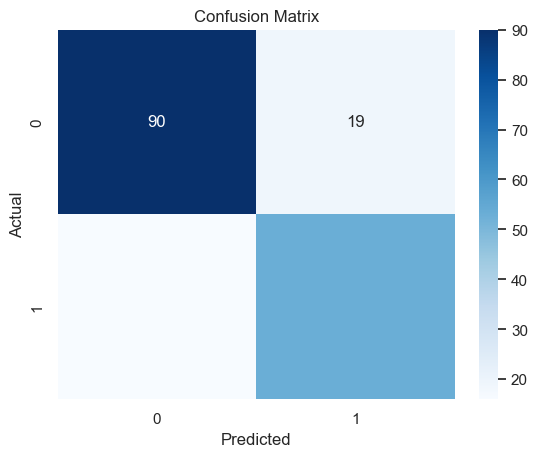

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.74      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.79       178
weighted avg       0.81      0.80      0.80       178



In [11]:
# Evaluate predictions
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

### Model Evaluation

- **Accuracy Score**: overall model performance
- **Confusion Matrix**: shows true/false positives and negatives
- **Classification Report**: includes precision, recall, f1-score

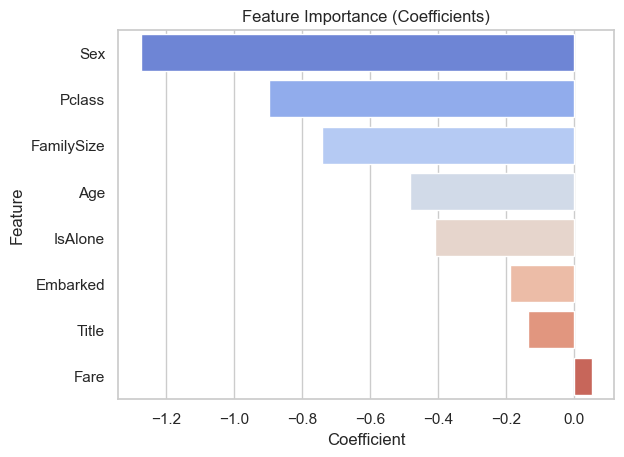

In [12]:
# Coefficients analysis
coef = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient')

sns.barplot(x='Coefficient', y='Feature', data=coef, palette='coolwarm')
plt.title("Feature Importance (Coefficients)")
plt.show()

### Feature Importance

Logistic regression coefficients show:
- Positive values → increase survival probability
- Negative values → decrease it

This helps interpret the model's decision logic.

## Final Insights from the Model

After cleaning the dataset and engineering features like `FamilySize`, `IsAlone`, and `Title`, we trained a logistic regression model and achieved **80.34% accuracy**.

### Key observations:
- **Sex** had the strongest influence: female passengers were far more likely to survive.
- **Pclass** mattered: 1st class passengers had higher survival rates.
- **Traveling alone** reduced survival probability.
- **Title** added extra value by grouping social status and age in a compact form.

This project demonstrated the end-to-end process of building a supervised classification model from data prep and feature engineering to modeling and evaluation using clean and explainable techniques.